In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

/Users/yvette/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False)


In [3]:
PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/yvette/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/yvette/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Download NLTK resources (stopwords and tokenizer)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()

# Get English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/yvette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# stop_words = {
#     'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
#     'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
#     "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
#     'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
#     'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
#     'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
#     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
#     'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
#     'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
#     'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
#     'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
#     'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
#     "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
# }

In [7]:
# def pre_process(text):
    
#     # lowercase
#     text=str(text).lower()

#     # remove numbers followed by dot (like, "1.", "2.", etc)
#     text=re.sub('((\d+)[\.])', '', text)
    
#     #remove tags
#     text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
#     # correct some misspellings and/or replace some text with others that might be easier to handle
#     text=text.replace('do not', "don't")
    
#     # remove special characters except spaces, apostrophes and dots
#     text=re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
#     # remove stopwords
#     text=[word for word in text.split(' ') if word not in stop_words]

#     # Basic tokenization by splitting the text
#     tokens = text.split()

#     # Remove stop words and apply stemming (rudimentary by chopping off common suffixes)
#     filtered_tokens = [word if not word.endswith(('ing', 'ly', 'ed', 's')) else word[:-2] for word in tokens if word not in stop_words]
    
#     # lemmatize
#     lmtzr = WordNetLemmatizer()
#     text = ' '.join((lmtzr.lemmatize(i)) for i in filtered_tokens)
    
#     return text

In [8]:

def pre_process(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove numbers followed by dots
    text = re.sub(r'(\d+\.)', '', text)
    
    # Remove HTML-like tags
    text = re.sub("&lt;/?.*?&gt;", " ", text)
    
    # Replace specific text patterns
    text = text.replace('do not', "don't")
    
    # Remove special characters, keeping spaces, apostrophes, and dots
    text = re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Re-join tokens into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [9]:
data = pd.read_csv('/Users/yvette/Downloads/McDonald_s_Reviews.csv', sep=',', encoding='ISO-8859-1')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [10]:
# Apply the basic preprocessing to the review column
data['processed_review_basic'] = data['review'].apply(pre_process)

# Display the first few rows of the dataset to show the processed reviews
data[['review', 'processed_review_basic']].head()

,review,processed_review_basic
0,Why does it look like someone spit on my food?...,look like someone spit food normal transaction...
1,It'd McDonalds. It is what it is as far as the...,it'd mcdonalds. far food atmosphere go. staff ...
2,Made a mobile order got to the speaker and che...,made mobile order got speaker checked in. line...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,mc. crispy chicken sandwich customer service q...
4,"I repeat my order 3 times in the drive thru, a...",repeat order 3 time drive thru still manage me...


In [11]:
data['rating_numeric'] = data['rating'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) and x.split()[0].isdigit() else None)
data['rating_numeric'].value_counts().sort_index()


rating_numeric
1     9431
2     3086
3     4818
4     5787
5    10274
Name: count, dtype: int64

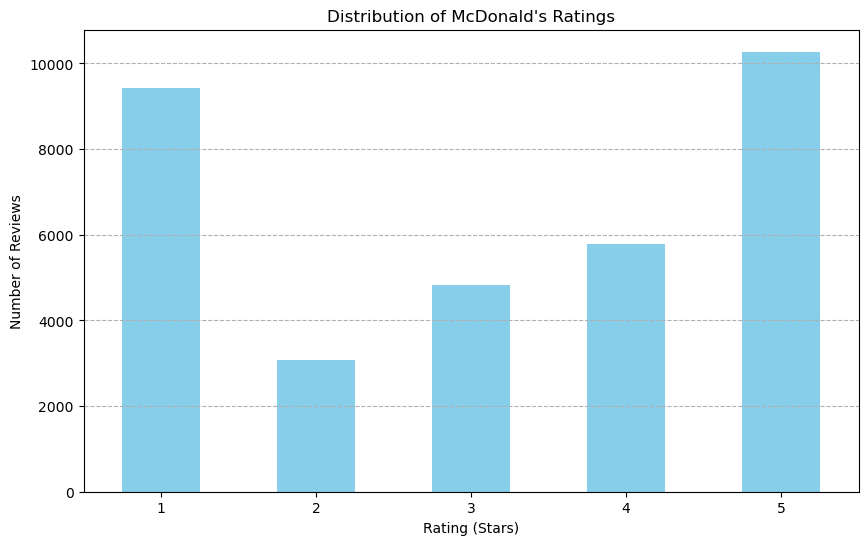

In [12]:
import matplotlib.pyplot as plt

# Plotting the distribution of numeric ratings
data['rating_numeric'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Distribution of McDonald\'s Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()


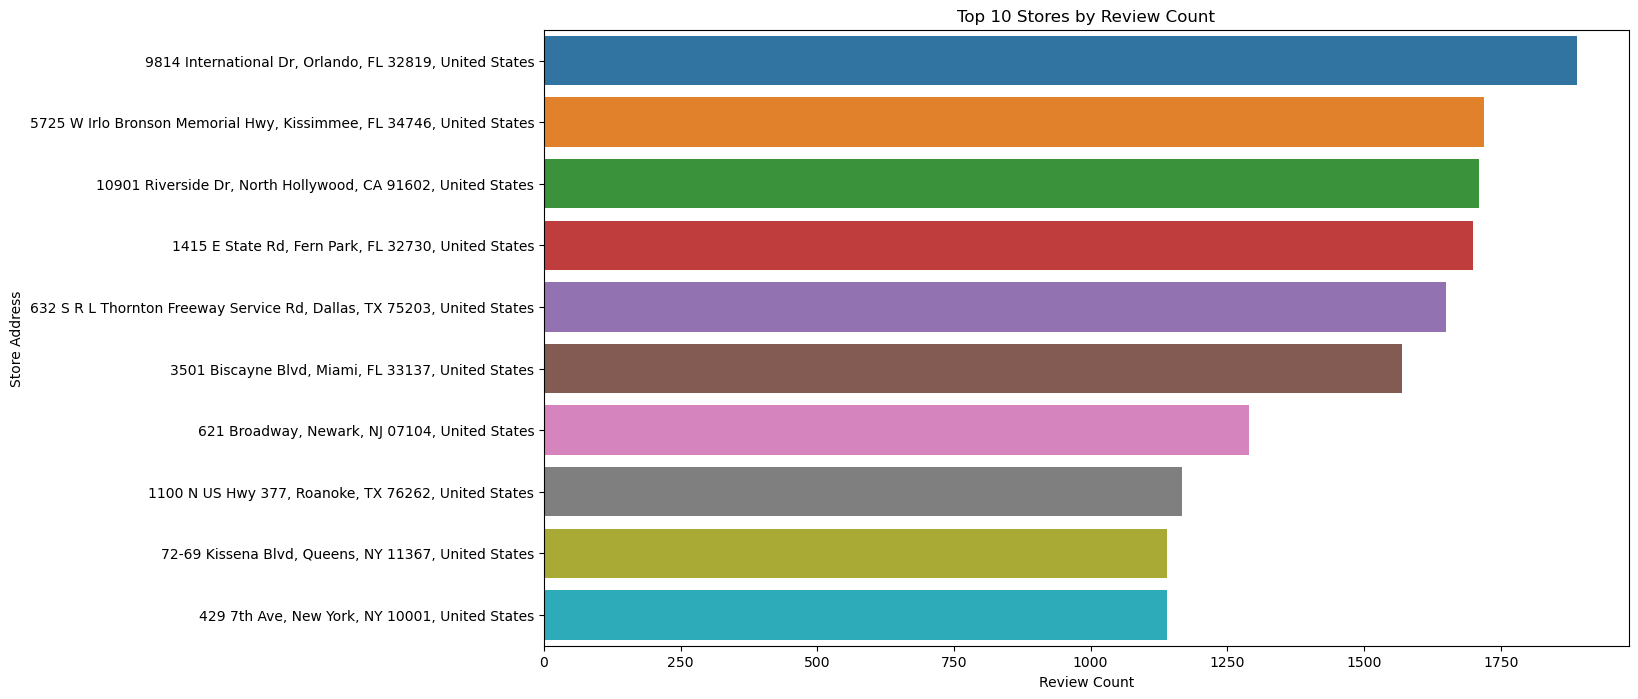

In [13]:
# Review counts per store
import seaborn as sns
plt.figure(figsize=(14, 8))
reviews_per_store = data['store_address'].value_counts().head(10)  # Top 10 stores by review count
sns.barplot(x=reviews_per_store.values, y=reviews_per_store.index)
plt.title('Top 10 Stores by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Store Address')
plt.show()


In [14]:
from datetime import datetime, timedelta
current_date = datetime.now()
def parse_review_time_updated(review_time):
    review_time = review_time.replace('a ', '1 ').replace('one ', '1 ')

    if 'years' in review_time or 'year' in review_time:
        years = int(review_time.split()[0])
        return current_date - timedelta(days=365*years)
    elif 'months' in review_time:
        months = int(review_time.split()[0])
        return current_date - timedelta(days=30*months) 
    elif 'month' in review_time:
        return current_date - timedelta(days=30)  # "1 month ago" 近似为30天
    elif 'days' in review_time or 'day' in review_time:
        days = int(review_time.split()[0])
        return current_date - timedelta(days=days)
    else:
        return current_date


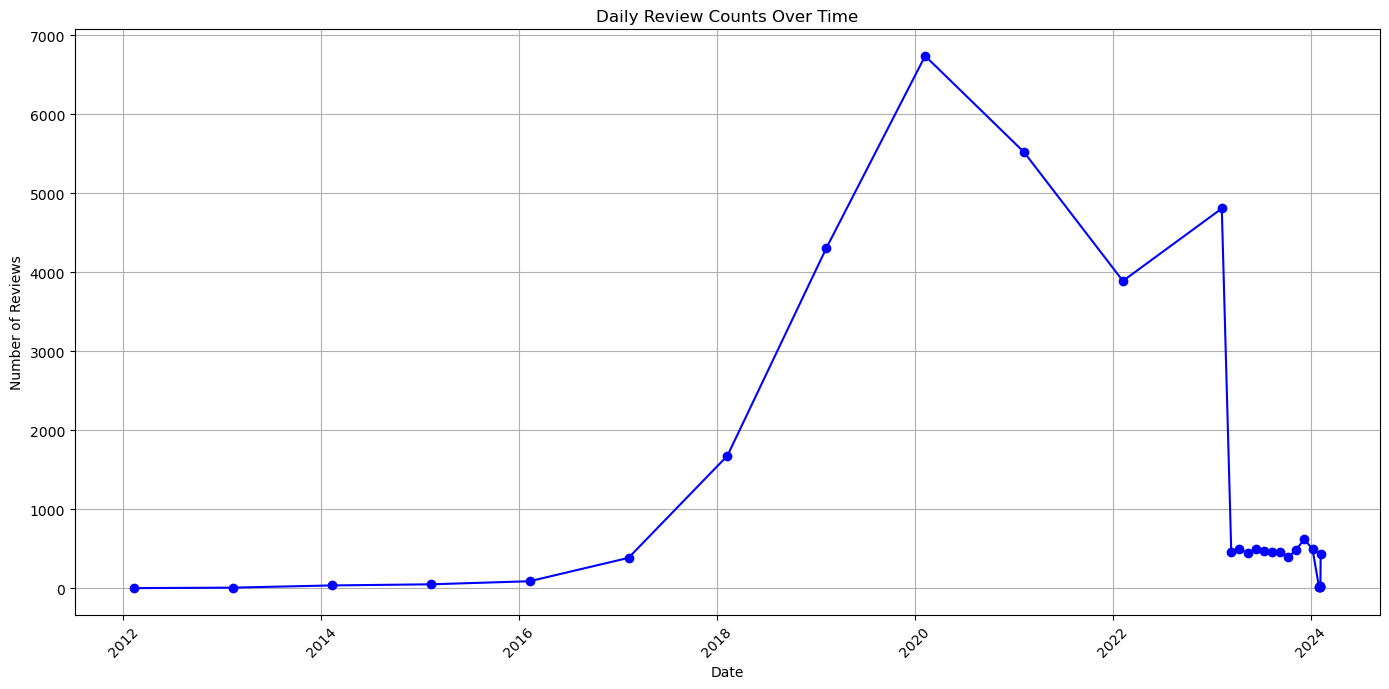

In [15]:
data['approx_review_date'] = data['review_time'].apply(parse_review_time_updated)
data['approx_review_date'] = data['approx_review_date'].dt.date
daily_reviews_count = data.groupby('approx_review_date').size()

plt.figure(figsize=(14, 7))
daily_reviews_count.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Daily Review Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_22381/2528464590.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  semi_annual_reviews_count = data.resample('6M').size()


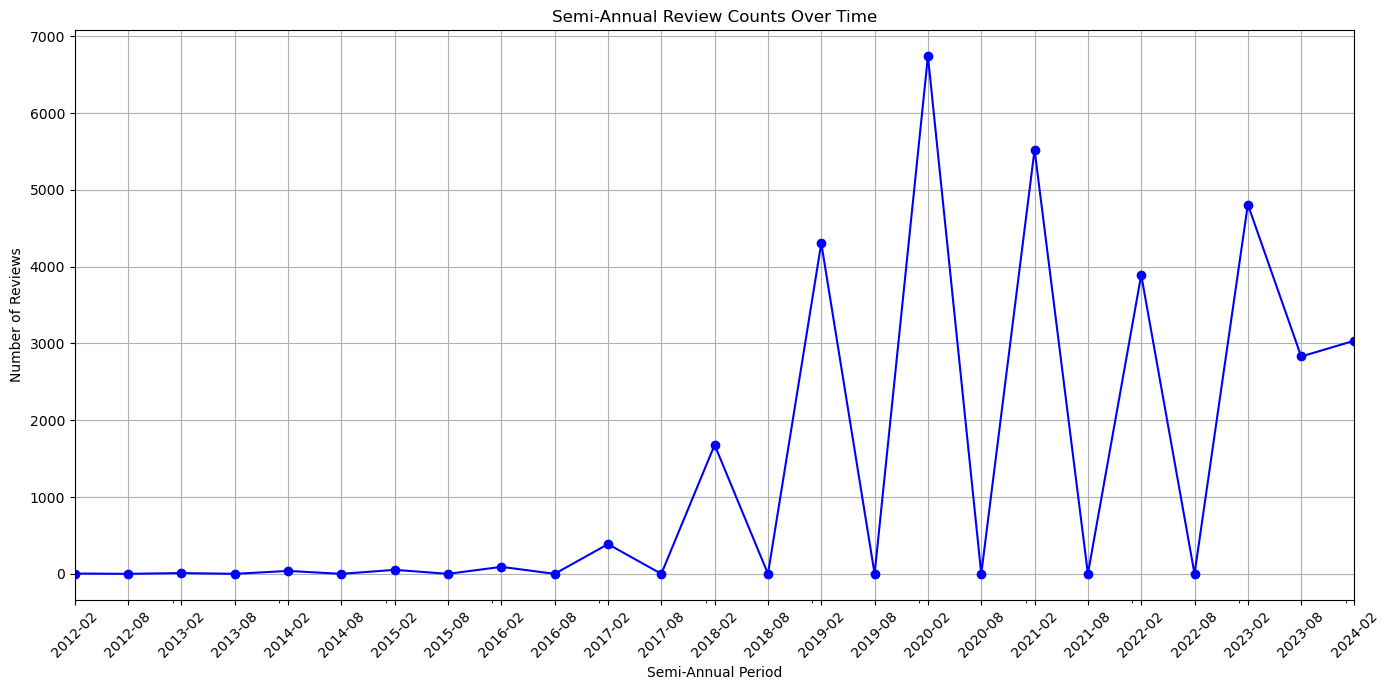

In [17]:
# from datetime import datetime, timedelta
# import pandas as pd
# import matplotlib.pyplot as plt

# # 假设 reviews_df 已经加载到 DataFrame 中
# # 定义解析评论时间字符串的函数
# def parse_review_time(review_time):
#     current_date = datetime.now()
#     review_time = review_time.replace('a ', '1 ').replace('one ', '1 ')
    
#     if 'years' in review_time or 'year' in review_time:
#         years = int(review_time.split()[0])
#         return current_date - timedelta(days=365 * years)
#     elif 'months' in review_time:
#         months = int(review_time.split()[0])
#         return current_date - timedelta(days=30 * months)
#     elif 'month' in review_time:
#         return current_date - timedelta(days=30)
#     elif 'days' in review_time or 'day' in review_time:
#         days = int(review_time.split()[0])
#         return current_date - timedelta(days=days)
#     else:
#         return current_date

# 应用函数转换评论时间到具体日期
data['approx_review_date'] = data['review_time'].apply(parse_review_time_updated)

# 设置转换后的日期为 DataFrame 的索引
data.set_index('approx_review_date', inplace=True)

# 使用 resample 方法以半年为单位聚合评论数量
semi_annual_reviews_count = data.resample('6M').size()

# 绘制评论数量随时间变化的图表
plt.figure(figsize=(14, 7))
semi_annual_reviews_count.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Semi-Annual Review Counts Over Time')
plt.xlabel('Semi-Annual Period')
plt.ylabel('Number of Reviews')
plt.grid(True)

# 设置X轴标签为详细日期
x_ticks_labels = semi_annual_reviews_count.index.strftime('%Y-%m')
plt.xticks(ticks=semi_annual_reviews_count.index, labels=x_ticks_labels, rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



In [18]:
pip install matplotlib basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.8/579.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


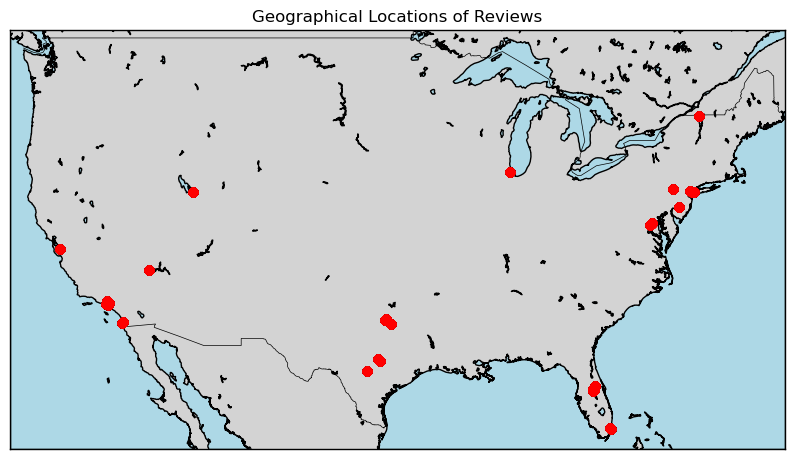

In [23]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# 初始化地图
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=24.396308, urcrnrlat=49.384358, llcrnrlon=-125.755837, urcrnrlon=-66.93457, lat_ts=20, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# 绘制经纬度数据为地图上的点
# 假设 reviews_df 包含您的经纬度数据
x, y = m(data['longitude'].values, data['latitude '].values)
m.scatter(x, y, marker='o', color='red', zorder=5)

plt.title('Geographical Locations of Reviews')
plt.show()
